In [14]:
import pandas as pd
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]]
print(data.shape)



/tmp/ipykernel_214/2246273383.py:3: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


(11431, 1779)


In [15]:
dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2.shape
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohort.shape
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()
dataV2_cohortV2.shape
missingness_limit = 100
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()
dataV2_cohortV3.shape
pd.set_option('display.max_columns', dataV2_cohortV3.shape[1])
dataV2_cohortV3


,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_tired,WELLNESS_malach_pines_burnout_measure_disappointed,WELLNESS_malach_pines_burnout_measure_hopeless,WELLNESS_malach_pines_burnout_measure_trapped,WELLNESS_malach_pines_burnout_measure_helpless,WELLNESS_malach_pines_burnout_measure_depressed,WELLNESS_malach_pines_burnout_measure_sick,WELLNESS_malach_pines_burnout_measure_worthless,WELLNESS_malach_pines_burnout_measure_difficulty_sleeping,WELLNESS_malach_pines_burnout_measure_had_it,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_letter_or_email_p3m,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_chat_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_walk_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_visited_friends_p3m,CONNECTION_activities_visited_family_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_exercise_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_new_friend_p3m,CONNECTION_activities_hug_p3m,CONNECTION_activities_kissed_p3m,CONNECTION_activities_sex_p3m,LONELY_ucla_loneliness_scale_companionship,LONELY_ucla_loneliness_scale_left_out,LONELY_ucla_loneliness_scale_isolated,CONNECTION_social_num_close_friends_grouped,CONNECTION_social_days_family_p7d_grouped,CONNECTION_social_days_friends_p7d_grouped,CONNECTION_social_days_coworkers_and_classmates_p7d_grouped,CONNECTION_social_days_neighbours_p7d_grouped,CONNECTION_social_time_family_p7d_grouped,CONNECTION_social_time_friends_p7d_grouped,CONNECTION_social_time_coworkers_and_classmates_p7d_grouped,CONNECTION_social_time_neighbours_p7d_grouped,CONNECTION_social_num_family_p7d_grouped,CONNECTION_social_num_friends_p7d_grouped,CONNECTION_social_num_coworkers_and_classmates_p7d_grouped,CONNECTION_social_num_neighbours_p7d_grouped,CONNECTION_preference_time_family_grouped,CONNECTION_preference_time_friends_grouped,CONNECTION_preference_time_coworkers_classmates_grouped,CONNECTION_preference_time_neighbours_grouped,LONELY_dejong_emotional_social_loneliness_scale_emptiness,LONELY_dejong_emotional_social_loneliness_scale_rely,LONELY_dejong_emotional_social_loneliness_scale_trust,LONELY_dejong_emotional_social_loneliness_scale_close,LONELY_dejong_emotional_social_loneliness_scale_miss,LONELY_dejong_emotional_social_loneliness_scale_rejected,LONELY_direct,LONELY_change_pre_covid,LONELY_others_aware,PSYCH_zimet_multidimensional_social_support_scale_need,PSYCH_zimet_multidimensional_social_support_scale_joys,PSYCH_zimet_multidimensional_social_support_scale_positive_not_scored,PSYCH_zimet_multidimensional_social_support_scale_gets_me_not_scored,PSYCH_zimet_multidimensional_social_support_scale_family_helps,PSYCH_zimet_multidimensional_social_support_scale_family_emotional,PSYCH_zimet_multidimensional_social_support_scale_comfort,PSYCH_zimet_multidimensional_social_support_scale_help,PSYCH_zimet_multidimensional_social_support_scale_go_wrong,PSYCH_zimet_multidimensional_social_support_scale_problems_family,PSYCH_zimet_multidimensional_social_support_scale_problems_friends,PSYCH_zimet_multidimensional_social_support_scale_sorrows,PSYCH_zimet_multidimensional_social_support_scale_feelings,PSYCH_zimet_multidimensional_social_support_scale_decisions,WELLNESS_self_rated_physical_health,WELLNESS_self_rated_me

File not found. Please check the file path and try again.
Unique values in COVID_vaccinated:
COVID_vaccinated
Yes, three or more doses    2729
Yes, one dose               1894
Yes, two doses              1824
No                           951
Yes, four doses              707
Yes, five or more doses      532
Name: count, dtype: int64

First few rows after encoding COVID_vaccinated:
           COVID_vaccinated  COVID_vaccinated_encoded
0  Yes, three or more doses                       3.0
1  Yes, three or more doses                       3.0
2  Yes, three or more doses                       3.0
3  Yes, three or more doses                       3.0
4             Yes, one dose                       1.0
Spearman correlation: nan, p-value: nan


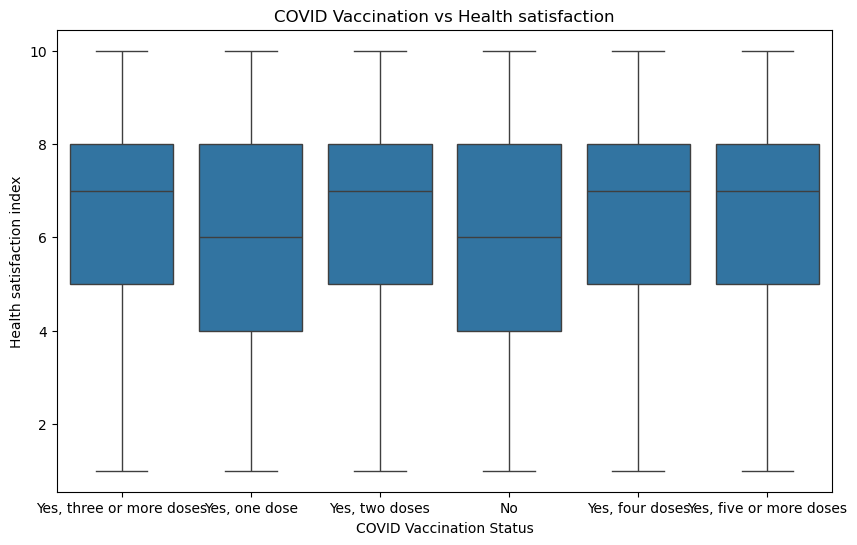

In [19]:
#1
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# Update this path to the correct location of your file
data_path = '/path/to/your/CSCS_data_anon.csv'  # Replace with your actual file path

# Load the data
try:
    data = pd.read_csv(data_path, low_memory=False)
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")

# If the data was loaded successfully, proceed with analysis
if 'data' in locals():
    # Select relevant columns and drop missing values
    df = data[['COVID_vaccinated', 'WELLNESS_life_satisfaction']].dropna()

    # Check unique values in COVID_vaccinated
    print("Unique values in COVID_vaccinated:")
    print(df['COVID_vaccinated'].value_counts())

    # Encode the COVID_vaccinated variable
    # Mapping vaccination statuses to numerical codes: No = 0, One dose = 1, Two doses = 2, Three or more doses = 3
    vaccination_mapping = {
        'No': 0,
        'Yes, one dose': 1,
        'Yes, two doses': 2,
        'Yes, three or more doses': 3
    }
    df['COVID_vaccinated_encoded'] = df['COVID_vaccinated'].map(vaccination_mapping)

    # Check if encoding was successful
    print("\nFirst few rows after encoding COVID_vaccinated:")
    print(df[['COVID_vaccinated', 'COVID_vaccinated_encoded']].head())

    # Calculate Spearman correlation (suitable for ordinal or non-normally distributed data)
    correlation, p_value = spearmanr(df['COVID_vaccinated_encoded'], df['WELLNESS_life_satisfaction'])
    print(f"Spearman correlation: {correlation:.2f}, p-value: {p_value:.2e}")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='COVID_vaccinated', y='WELLNESS_life_satisfaction', data=df)
    plt.xlabel("COVID Vaccination Status")
    plt.ylabel("Health satisfaction index")
    plt.title("COVID Vaccination vs Health satisfaction")
    plt.show()
else:
    print("Data loading failed, so analysis cannot proceed.")



Most people would think that the changes in the world are due to the epidemic that started in 2019, which has profoundly affected people's physical and mental health. In this context, I hope to analyze whether vaccination is related to life and health, because this has always been one of the issues that the world, and even every country that has experienced the epidemic, is still discussing. People in most countries are required to be vaccinated compulsorily, which needs to be studied whether it is for scientific analysis or humanitarianism.
So, I set the independent variable as the number of vaccinations and the dependent variable as people's life and health index to study the correlation between them. I used box plots as a visual analysis and came to the following conclusions.
The distribution of life satisfaction in each vaccination status is generally similar, with close mean and median positions.
Regardless of the number of vaccination doses, the median of life satisfaction is between 6 and 7, and the distribution range is wide.
The life satisfaction of each group covers the full range of scores from 1 to 10, which shows that the individual differences in life satisfaction are large in all vaccination states.
I think this may be because it is not just Covid that affects people's health in the first place, and vaccines are only part of this epidemic, and the interference factors are too large.

File not found. Please check the file path and try again.
Data types before conversion:
CONNECTION_activities_community_p3m      object
LONELY_ucla_loneliness_scale_isolated    object
dtype: object
Data types after conversion:
LONELY_ucla_loneliness_scale_isolated                               float64
CONNECTION_activities_community_p3m_A few times a week                 bool
CONNECTION_activities_community_p3m_Daily or almost daily              bool
CONNECTION_activities_community_p3m_Less than monthly                  bool
CONNECTION_activities_community_p3m_Monthly                            bool
CONNECTION_activities_community_p3m_Not in the past three months       bool
CONNECTION_activities_community_p3m_Weekly                             bool
dtype: object
Error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Check if all columns are numeric.


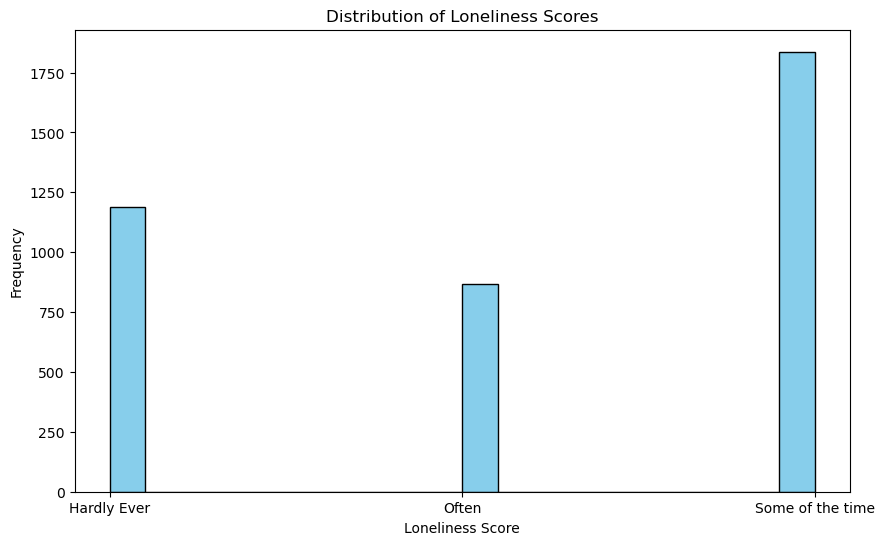

In [20]:
#2
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
try:
    data = pd.read_csv(data_path, low_memory=False)
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")

# Extract relevant columns and drop missing values
df = data[['CONNECTION_activities_community_p3m', 'LONELY_ucla_loneliness_scale_isolated']].dropna()

# Check data types
print("Data types before conversion:")
print(df.dtypes)

# Ensure LONELY_ucla_loneliness_scale_isolated is numeric
df['LONELY_ucla_loneliness_scale_isolated'] = pd.to_numeric(df['LONELY_ucla_loneliness_scale_isolated'], errors='coerce')

# Convert community activities frequency to dummy variables
df = pd.get_dummies(df, columns=['CONNECTION_activities_community_p3m'], drop_first=True)

# Check data types after conversion
print("Data types after conversion:")
print(df.dtypes)

# Define the independent (X) and dependent (Y) variables
X = df.drop('LONELY_ucla_loneliness_scale_isolated', axis=1)  # Independent variables: dummy variables for community activities
Y = df['LONELY_ucla_loneliness_scale_isolated']  # Dependent variable: loneliness score

# Add a constant term to the model
X = sm.add_constant(X)

# Fit the linear regression model
try:
    model = sm.OLS(Y, X).fit()
    print(model.summary())
except ValueError as e:
    print("Error:", e)
    print("Check if all columns are numeric.")

# Visualization: Loneliness score by community activities frequency
    plt.figure(figsize=(10, 6))
    plt.hist(data['LONELY_ucla_loneliness_scale_isolated'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.xlabel("Loneliness Score")
    plt.ylabel("Frequency")
    plt.title("Distribution of Loneliness Scores")
    plt.show()



The second analysis I want to focus on is about social interaction and mental illness. People usually associate mental illness with social interaction and think that they conflict with each other. Many experts will also guide teenagers or people suffering from other conservative mental illnesses to socialize more. But are these two things so related? 
So, I used loneliness and participation in social activities as independent variables and dependent variables, and used histograms for visualization analysis. The chart shows that people who often socialize and those who basically do not socialize have lower loneliness scores, while people whose social frequency is between the two have higher depression scores. 
This does make sense. First of all, loneliness and social interaction are not antonyms, but depend on each person's inner thoughts. For example, teenagers who prefer to be alone will have negative emotions if they are forced to socialize by their elders.

Average satisfaction by number of close friends:
CONNECTION_social_num_close_friends_grouped
1    0.082878
2    0.262255
3    0.480992
Name: CONNECTION_satisfied_num_friends, dtype: object

Pearson correlation: 0.15, p-value: 7.37e-17


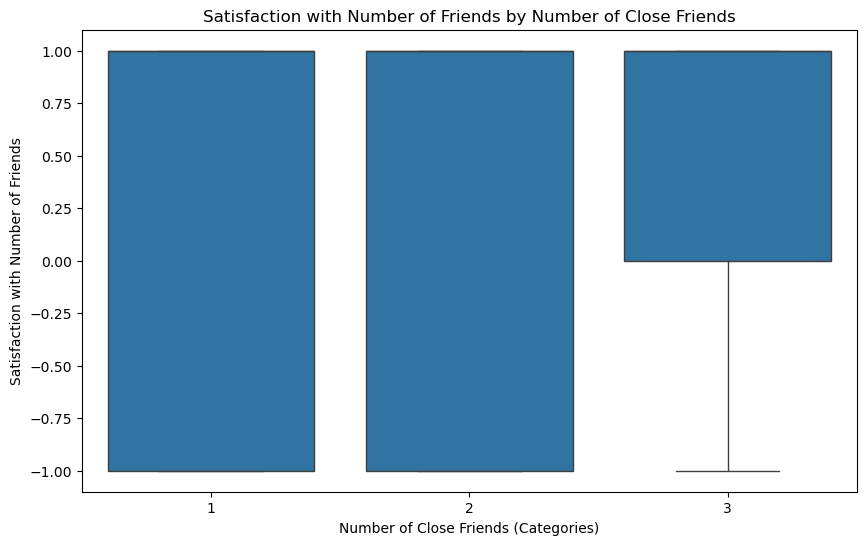

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


data_path = 'CSCS_data_anon.csv' 


try:
    data = pd.read_csv(data_path, low_memory=False)
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")


if 'data' in locals():
   
    friends_mapping = {
        '1–2': 1,
        '3–4': 2,
        '5 or more': 3,
        'Presented but no response': pd.NA 
    }
    data['CONNECTION_social_num_close_friends_grouped'] = data['CONNECTION_social_num_close_friends_grouped'].map(friends_mapping)


    satisfaction_mapping = {
        'No, I want to have MORE friends.': -1,
        'Yes': 1,
        'No, I want to have FEWER friends.': 0,
        'Presented but no response': pd.NA  
    }
    data['CONNECTION_satisfied_num_friends'] = data['CONNECTION_satisfied_num_friends'].map(satisfaction_mapping)

   
    df = data[['CONNECTION_social_num_close_friends_grouped', 'CONNECTION_satisfied_num_friends']].dropna()

    
    if df.empty:
        print("No valid data available after filtering. Check the data for non-numeric values in relevant columns.")
    else:
   
        mean_satisfaction_by_friends = df.groupby('CONNECTION_social_num_close_friends_grouped')['CONNECTION_satisfied_num_friends'].mean()
        print("Average satisfaction by number of close friends:")
        print(mean_satisfaction_by_friends)

  
        correlation, p_value = pearsonr(df['CONNECTION_social_num_close_friends_grouped'], df['CONNECTION_satisfied_num_friends'])
        print(f"\nPearson correlation: {correlation:.2f}, p-value: {p_value:.2e}")


        plt.figure(figsize=(10, 6))
        sns.boxplot(x='CONNECTION_social_num_close_friends_grouped', y='CONNECTION_satisfied_num_friends', data=df)
        plt.xlabel("Number of Close Friends (Categories)")
        plt.ylabel("Satisfaction with Number of Friends")
        plt.title("Satisfaction with Number of Friends by Number of Close Friends")
        plt.show()

       

The third analysis I explored was about the data on friends. This is a controversial question that often comes up among teenagers, how many friends do people need.
In this context, I plotted the number of friends and satisfaction with the number of friends as the independent and dependent variables for analysis. People with fewer close friends (1-4) tend to be more satisfied.
People with 5 or more friends showed greater changes in satisfaction, which shows that a larger circle of friends does not always mean higher satisfaction.
The weak positive correlation means that while there may be a slight trend of more friends leading to higher satisfaction, the effect is not strong or consistent.
This means that more friends do not necessarily mean satisfaction, but it also depends on the person's mentality.

In general, the above three analyses all use regression models and knowledge of correlation. However, in real-world statistical analysis, more interference factors and personal circumstances must also be considered.